In [1]:
import pandas as pd
df1 = pd.read_csv('RESULT.oa.csv')
df2 = pd.read_csv('RESULT.non oa.csv')
df = pd.concat([df1, df2], axis=0)  # axis=0表示垂直堆叠，axis=1表示水平堆叠
missing_counts = df.isna().sum()
non_missing_counts = df.count()

# 计算每列的缺失率
missing_rates = missing_counts / (non_missing_counts+missing_counts)

# 打印每列的缺失率
# 将缺失率转换为DataFrame
missing_rate_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Non-Missing Count': non_missing_counts,
    'Missing Rate': missing_rates})

# 重新排列列的顺序
missing_rate_df = missing_rate_df[['Non-Missing Count', 'Missing Count', 'Missing Rate']]

# 打印缺失率DataFrame
print(missing_rate_df)
print(df1.shape,df2.shape)
missing_rate_df.head(200)

            Non-Missing Count  Missing Count  Missing Rate
label                     709              0           0.0
Gender                    709              0           0.0
Age                       709              0           0.0
BMI                       709              0           0.0
SBP                       709              0           0.0
...                       ...            ...           ...
Busyness                  709              0           0.0
Coarseness                709              0           0.0
Complexity                709              0           0.0
Contrast.1                709              0           0.0
Strength                  709              0           0.0

[131 rows x 3 columns]
(346, 131) (363, 131)


,Non-Missing Count,Missing Count,Missing Rate
label,709,0,0.0
Gender,709,0,0.0
Age,709,0,0.0
BMI,709,0,0.0
SBP,709,0,0.0
...,...,...,...
Busyness,709,0,0.0
Coarseness,709,0,0.0
Complexity,709,0,0.0
Contrast.1,709,0,0.0


In [2]:
df = pd.concat([df1, df2], axis=0)  # axis=0表示垂直堆叠，axis=1表示水平堆叠
print(df.shape)

(709, 131)


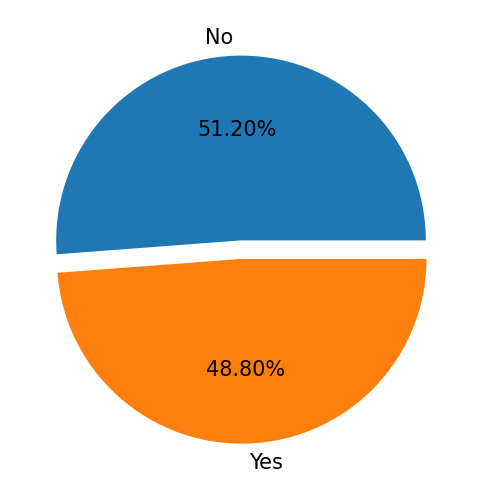

In [3]:
# 观察是否存在类别不平衡现象
# for index in config.data_field_names:
import matplotlib.pyplot as plt

df_data=df
p = df_data['label'].value_counts()    # 目标变量正负样本的分布

plt.figure(figsize=(10,6))    # 构建图像

# 绘制饼图并调整字体大小
patches, l_text, p_text = plt.pie(p,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
# l_text是饼图对着文字大小，p_text是饼图内文字大小
for t in p_text:
    t.set_size(15)
for t in l_text:
    t.set_size(15)

plt.show()    # 展示图像

In [4]:
 # 数据采样
# 计算正负样本所取数量
df_label = df_data
# df_label = df_data.fillna(0)
print("打印field:",df_label["label"].value_counts())
min_sample = min(df_label["label"].value_counts()[1], df_label["label"].value_counts()[0])
print("min_sample: " + str(min_sample))

max_sample = max(df_label["label"].value_counts()[1], df_label["label"].value_counts()[0])
print("max_sample: " + str(max_sample))

# df_label = df_label[config.data_field_names]

打印field: 0    363
1    346
Name: label, dtype: int64
min_sample: 346
max_sample: 363


In [5]:
 # min_sample = 200000 开始随机采样
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

data_deliver_success = df_label[df_label["label"] ==0].sample(n=max_sample)
print("data_deliver_success: " + str(data_deliver_success.shape))
data_deliver_failed = df_label[df_label["label"] ==1].sample(n=min_sample)
print("data_deliver_failed: " + str(data_deliver_failed.shape))

# 创建训练数据
data_deliver_success_train, data_deliver_success_test, _, _ = train_test_split(data_deliver_success,
                                                                                   data_deliver_success["label"],
                                                                                   test_size=0.3,
                                                                                   random_state=12343)
data_deliver_failed_train, data_deliver_failed_test, _, _ = train_test_split(data_deliver_failed,
                                                                                   data_deliver_failed["label"],
                                                                                   test_size=0.3,
                                                                                   random_state=12343)
data_deliver_success_train.head()

# 数据混洗
train_data = shuffle(pd.concat([data_deliver_success_train, data_deliver_failed_train], axis=0))
train_data.reset_index(drop=True)
print("train_data shape is " + str(train_data.shape))

test_data = shuffle(pd.concat([data_deliver_success_test, data_deliver_failed_test], axis=0))
test_data.reset_index(drop=True)
print("test_data shape is " + str(test_data.shape))
train_data.head(200)

data_deliver_success: (363, 131)
data_deliver_failed: (346, 131)
train_data shape is (496, 131)
test_data shape is (213, 131)


,label,Gender,Age,BMI,SBP,DBP,PT,INR,ALT,AST,...,SmallAreaHighGrayLevelEmphasis,SmallAreaLowGrayLevelEmphasis,ZoneEntropy,ZonePercentage,ZoneVariance,Busyness,Coarseness,Complexity,Contrast.1,Strength
11,0,1,71,21.64,136.0,88,14.0,1.09,21,20,...,5.069387,0.106773,3.492465,0.022478,141492.01050,26.437267,0.001782,3.133512,0.006103,0.014861
281,0,0,57,23.05,129.0,66,12.9,1.02,11,16,...,2.025026,0.226896,3.992528,0.018372,237154.82400,89.319651,0.001686,0.739042,0.010604,0.003658
323,0,1,89,23.14,176.0,85,14.0,1.10,19,17,...,3.458707,0.105843,4.506563,0.020941,123598.77350,27.630991,0.001849,3.685706,0.010594,0.012594
18,0,0,71,19.98,126.0,79,13.0,0.99,22,25,...,2.281038,0.131818,3.177800,0.007336,496942.30900,52.203322,0.001266,1.932309,0.007522,0.007587
74,1,0,82,28.13,145.0,66,13.9,1.14,12,21,...,5.556720,0.100672,4.052516,0.024207,98128.65816,36.475021,0.001420,4.535497,0.014958,0.010737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,1,1,72,27.34,135.0,80,13.9,1.09,16,19,...,5.958494,0.248027,2.868904,0.023178,83287.01010,72.862276,0.001205,3.007018,0.025429,0.006452
187,0,0,63,25.22,135.0,72,13.3,1.06,13,15,...,2.359595,0.338735,3.144878,0.008703,444732.30620,133.553594,0.001213,1.053061,0.017427,0.003023
194,1,1,79,28.72,130.0,64,13.9,1.11,13,24,...,4.764065,0.248477,3.912546,0.019389,105223.89640,42.083178,0.001444,4.229494,0.014871,0.013226
343,0,0,82,26.84,142.0,72,13.4,1.03,31,24,...,5.622355,0.201060,3.076954,0.020173,119981.31160,86.477898,0.001006,2.897382,0.023758,0.005428


In [6]:
# 生成模型训练测试集
import sys
sys.path.append('..')

# 填充缺失值
print(train_data.dtypes)
y_train = train_data["label"]
X_train = train_data.fillna(0).drop('label', axis=1)

y_test = test_data["label"]
X_test = test_data.fillna(0).drop('label', axis=1)
X_train.head()

label           int64
Gender          int64
Age             int64
BMI           float64
SBP           float64
               ...   
Busyness      float64
Coarseness    float64
Complexity    float64
Contrast.1    float64
Strength      float64
Length: 131, dtype: object


,Gender,Age,BMI,SBP,DBP,PT,INR,ALT,AST,GGT,...,SmallAreaHighGrayLevelEmphasis,SmallAreaLowGrayLevelEmphasis,ZoneEntropy,ZonePercentage,ZoneVariance,Busyness,Coarseness,Complexity,Contrast.1,Strength
11,1,71,21.64,136.0,88,14.0,1.09,21,20,36,...,5.069387,0.106773,3.492465,0.022478,141492.01050,26.437267,0.001782,3.133512,0.006103,0.014861
281,0,57,23.05,129.0,66,12.9,1.02,11,16,12,...,2.025026,0.226896,3.992528,0.018372,237154.82400,89.319651,0.001686,0.739042,0.010604,0.003658
323,1,89,23.14,176.0,85,14.0,1.10,19,17,33,...,3.458707,0.105843,4.506563,0.020941,123598.77350,27.630991,0.001849,3.685706,0.010594,0.012594
18,0,71,19.98,126.0,79,13.0,0.99,22,25,26,...,2.281038,0.131818,3.177800,0.007336,496942.30900,52.203322,0.001266,1.932309,0.007522,0.007587
74,0,82,28.13,145.0,66,13.9,1.14,12,21,65,...,5.556720,0.100672,4.052516,0.024207,98128.65816,36.475021,0.001420,4.535497,0.014958,0.010737


显著性特征及其 p-value：
                       Feature Name       p-value
0                               Age  3.094807e-24
1                               BMI  1.072205e-14
2                               AST  3.412482e-02
3                              TBil  1.719506e-08
4                               FPG  1.523390e-14
..                              ...           ...
66  SizeZoneNonUniformityNormalized  2.674369e-03
67    SmallAreaLowGrayLevelEmphasis  2.811390e-04
68                   ZonePercentage  1.239416e-03
69                       Coarseness  4.816656e-02
70                       Contrast.1  1.304006e-03

[71 rows x 2 columns]
Lasso选择的特征数量: 14
Lasso 选择的特征及其系数：
                       Feature Name  Coefficient
0                               Age     0.131182
1                               BMI     0.086524
2                              TBil     0.002588
3                               FPG     0.075207
4                                TG     0.004734
5                             LD

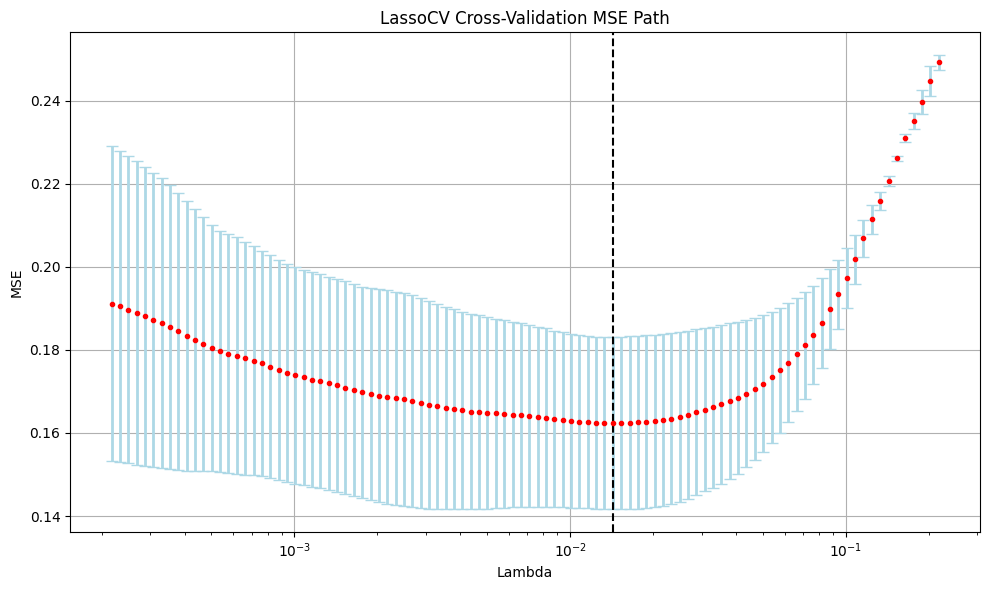

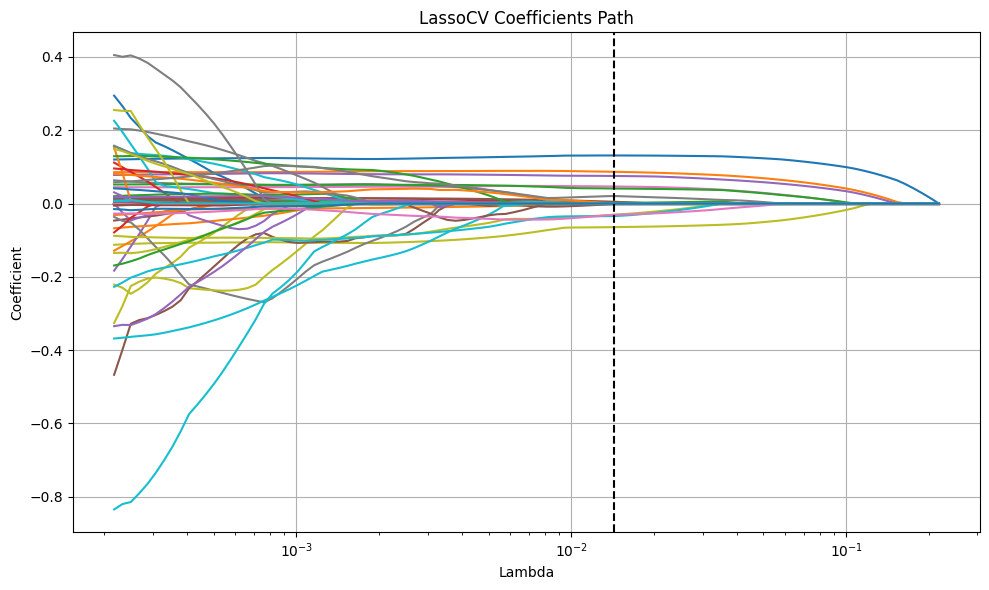

In [7]:
#数据标准化并做T检测+Lasso特征选择
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.exceptions import ConvergenceWarning
from matplotlib.ticker import MultipleLocator
import warnings
import pandas as pd

# 数据标准化并做 T 检测 + Lasso 特征选择
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# 假设 X_train, X_test, y_train 是已经定义好的训练和测试数据集

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# t 检验选择显著性特征
p_values = []
for i in range(X_train.shape[1]):
    t_stat, p_val = stats.ttest_ind(X_train_scaled[y_train == 0, i], X_train_scaled[y_train == 1, i])
    p_values.append(p_val)

p_values = np.array(p_values)
alpha = 0.05  # 显著性水平
significant_features = np.where(p_values < alpha)[0]

# 输出显著特征及其特征名和 p-value
significant_feature_names = df_data.columns[significant_features]
significant_features_values = pd.DataFrame({
    'Feature Name': significant_feature_names,
    'p-value': p_values[significant_features]
})
print("显著性特征及其 p-value：")
print(significant_features_values)

X_train_significant = X_train_scaled[:, significant_features]
X_test_significant = X_test_scaled[:, significant_features]

# 使用 Lasso 进行特征选择和模型训练
lasso = LassoCV(cv=5, max_iter=100000)
lasso.fit(X_train_significant, y_train)

# 选择 Lasso 中的非零系数特征
lasso_features = np.where(lasso.coef_ != 0)[0]
lasso_selected_feature_names = significant_feature_names[lasso_features]
lasso_selected_coefficients = lasso.coef_[lasso_features]
X_train_lasso = X_train_scaled[:, significant_features][:, lasso_features]
X_test_lasso = X_test_scaled[:, significant_features][:, lasso_features]
print(f"Lasso选择的特征数量: {len(lasso_features)}")

lasso_feature_importance = pd.DataFrame({
    'Feature Name': lasso_selected_feature_names,
    'Coefficient': lasso_selected_coefficients
})

print("Lasso 选择的特征及其系数：")
print(lasso_feature_importance)

# 绘制 Lasso 交叉验证 MSE 路径图
alphas = lasso.alphas_
MSEs_mean = np.mean(lasso.mse_path_, axis=1)
MSEs_std = np.std(lasso.mse_path_, axis=1)

plt.figure(figsize=(10, 6))
plt.errorbar(alphas, MSEs_mean, yerr=MSEs_std,
             fmt="o", ms=3, mfc="r", mec="r", ecolor="lightblue",
             elinewidth=2, capsize=4, capthick=1)
plt.semilogx()
plt.axvline(lasso.alpha_, color='black', ls='--')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('LassoCV Cross-Validation MSE Path')
ax = plt.gca()
y_major_locator = MultipleLocator(0.02)
ax.yaxis.set_major_locator(y_major_locator)
plt.grid(True)
plt.tight_layout()
plt.show()

# 计算并绘制 Lasso 系数路径
alphas_, coefs_path, _ = lasso.path(X_train_significant, y_train, alphas=alphas, max_iter=100000)
coefs = coefs_path.T
plt.figure(figsize=(10, 6))
plt.semilogx(alphas_, coefs, '-')
plt.axvline(lasso.alpha_, color='black', ls='--')
plt.xlabel('Lambda')
plt.ylabel('Coefficient')
plt.title('LassoCV Coefficients Path')
plt.grid(True)
plt.tight_layout()
plt.show()



(array([254.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 242.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

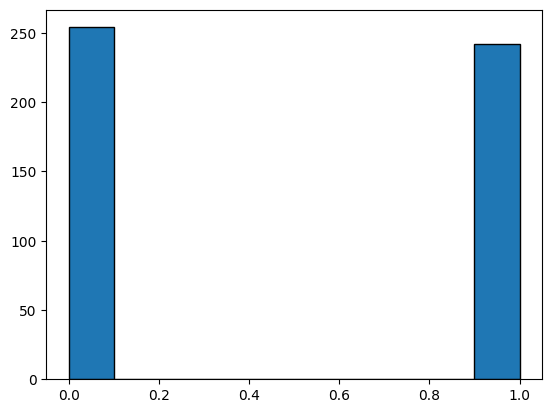

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 查看训练数据样本是否平衡

train_labels = np.array(y_train.astype(np.int64)).reshape((-1,))
test_labels = np.array(y_test.astype(np.int64)).reshape((-1,))

features = np.array(X_train_lasso)
test_features = np.array(X_test_lasso)
labels = train_labels[:]

plt.hist(labels, edgecolor = 'k')

In [9]:
# 创建SVC训练模型
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
# 创建 SVM 分类器实例
svc = SVC(kernel='linear', probability=True)  # 使用线性核

# 训练模型
svc.fit(X_train_lasso, y_train)

# logreg = joblib.load(filename='logreg_model.pkl')

# 预测概率
y_proba = svc.predict_proba(X_test_lasso)[:, 1]  # 只取正类的概率

# 预测测试集
y_pred = svc.predict(X_test_lasso)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"SVC准确率: {accuracy}")
print(f"conf_matrix是一个二维数组，表示混淆矩阵，它展示了模型预测结果与实际标签的对比:\n{conf_matrix}")
print(f"class_report是一个字符串，包含了分类报告，报告了每个类别的精确度（precision）、召回率（recall）、f1分数（f1-score）和准确率（accuracy）:\n{class_report}")


SVC准确率: 0.7699530516431925
conf_matrix是一个二维数组，表示混淆矩阵，它展示了模型预测结果与实际标签的对比:
[[87 22]
 [27 77]]
class_report是一个字符串，包含了分类报告，报告了每个类别的精确度（precision）、召回率（recall）、f1分数（f1-score）和准确率（accuracy）:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       109
           1       0.78      0.74      0.76       104

    accuracy                           0.77       213
   macro avg       0.77      0.77      0.77       213
weighted avg       0.77      0.77      0.77       213



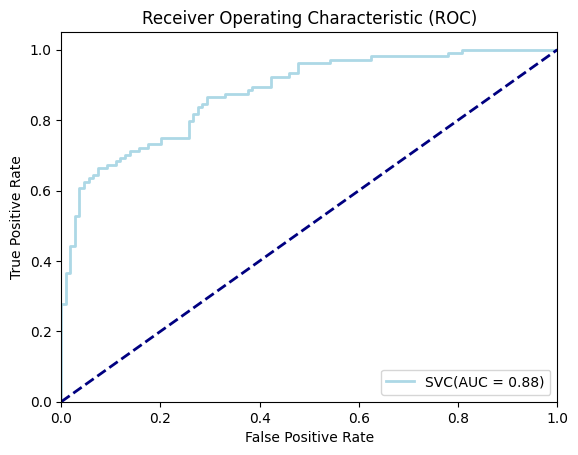

In [10]:
# 0615
# 绘制SVC向量ROC
# 计算ROC曲线和AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='lightblue', lw=lw, label=f'SVC(AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 创建随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf.fit(X_train_lasso , y_train)

# 预测测试集
y_pred = rf.predict(X_test_lasso)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"随机森林准确率: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

随机森林准确率: 0.7699530516431925
Confusion Matrix:
[[87 22]
 [27 77]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       109
           1       0.78      0.74      0.76       104

    accuracy                           0.77       213
   macro avg       0.77      0.77      0.77       213
weighted avg       0.77      0.77      0.77       213



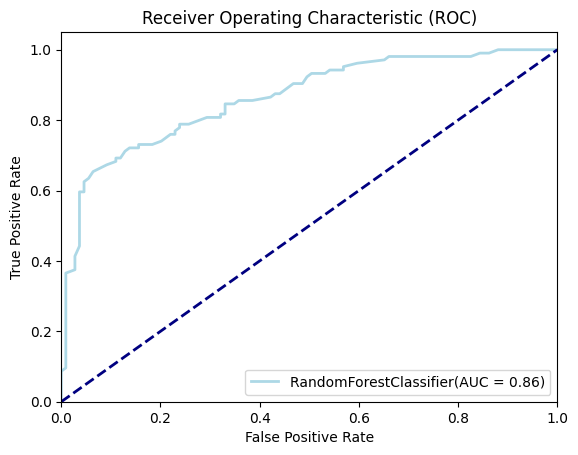

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 获取概率预测，这里我们关注正类（通常假设为1）
y_prob = rf.predict_proba(X_test_lasso)[:, 1]

# 计算ROC曲线和AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='lightblue', lw=lw, label=f'RandomForestClassifier(AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [13]:
import lightgbm as lgb
import numpy as np
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from pandas import Series
from sklearn.metrics import roc_auc_score
from lightgbm import log_evaluation, early_stopping


# 定义数据集
# train_data = lgb.Dataset(X_train, label=y_train)
# test_data = lgb.Dataset(X_test_lasso, label=y_test, reference=train_data)

train_data = lgb.Dataset(X_train_lasso, label=y_train)
val_data = lgb.Dataset(X_test_lasso, label=y_test, reference=train_data)

# 设置参数
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',  # 或者 'multiclass'，根据你的问题类型选择
    'metric': 'binary_logloss',  # 对于二分类问题
    'metric': ['accuracy', 'auc'],  # 对于多分类问题，或者将'binary_logloss'替换为'multi_logloss'
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# 开始训练
callbacks = [log_evaluation(period=100), early_stopping(stopping_rounds=10)]# 早期停止轮数
gbm = lgb.train(params,
                train_data,
                num_boost_round=100,  #  Boosting轮数
                valid_sets=val_data,
                callbacks =callbacks)  

# 在验证集上预测
y_pred_val = gbm.predict(X_test_lasso)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred_val.round())
print(f'Accuracy: {accuracy:.4f}')

# 计算AUC
auc = roc_auc_score(y_test, y_pred_val)
print(f'AUC: {auc:.4f}')

# 获取特征重要度
feature_importance = gbm.feature_importance()
sorted_idx = feature_importance.argsort()

print(feature_importance)

# 预测测试集
# y_pred = gbm.predict(X_test_lasso, num_iteration=gbm.best_iteration)

# 计算metrics
accuracy = accuracy_score(y_test, y_pred_val.round())
precision = precision_score(y_test, y_pred_val.round())
recall = recall_score(y_test, y_pred_val.round())
f1 = f1_score(y_test, y_pred_val.round())

# 打印metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
# 评估模型

accuracy = accuracy_score(y_test, y_pred_val.round())
conf_matrix = confusion_matrix(y_test, y_pred_val.round())
class_report = classification_report(y_test, y_pred_val.round())
print(f"gbm准确率: {accuracy}")
print(f"conf_matrix是一个二维数组，表示混淆矩阵，它展示了模型预测结果与实际标签的对比:\n{conf_matrix}")
print(f"class_report是一个字符串，包含了分类报告，报告了每个类别的精确度（precision）、召回率（recall）、f1分数（f1-score）和准确率（accuracy）:\n{class_report}")

print("开始输出模型特征排序")
features = Series(gbm.feature_importance(), index=gbm.feature_name())
features = features.sort_values(ascending=False)

# 加载json文件
# definition_file = "dataset_column_definition.json"
# with open(definition_file, "r") as f:
#     definitions = json.load(f)

for index in range(len(features)):
    feature_name, feature_value = features.index[index], features.iloc[index]
    print(feature_name, feature_value)

#     print(feature_name,definitions.get(feature_name), feature_value)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

AUC: 0.87
分类报告:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       109
           1       0.80      0.75      0.77       104

    accuracy                           0.78       213
   macro avg       0.78      0.78      0.78       213
weighted avg       0.78      0.78      0.78       213

混淆矩阵:
[[89 20]
 [26 78]]


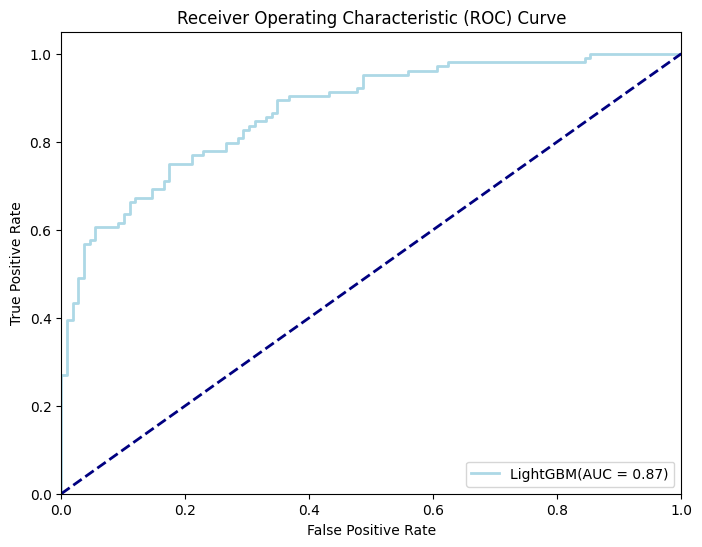

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,classification_report,confusion_matrix
# 预测测试集的概率
y_prob = gbm.predict(X_test_lasso)

# 计算ROC曲线的参数
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# 打印评估结果
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")
# 模型预测
y_pred = np.round(y_prob)
print("分类报告:")
print(classification_report(y_test, y_pred))
print("混淆矩阵:")
print(confusion_matrix(y_test, y_pred))

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='lightblue', lw=2, label=f'LightGBM(AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


二分类逻辑回归准确率：0.77
二分类逻辑回归AUC: 0.8690014114326041
分类报告:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       109
           1       0.78      0.73      0.76       104

    accuracy                           0.77       213
   macro avg       0.77      0.77      0.77       213
weighted avg       0.77      0.77      0.77       213

混淆矩阵:
[[88 21]
 [28 76]]


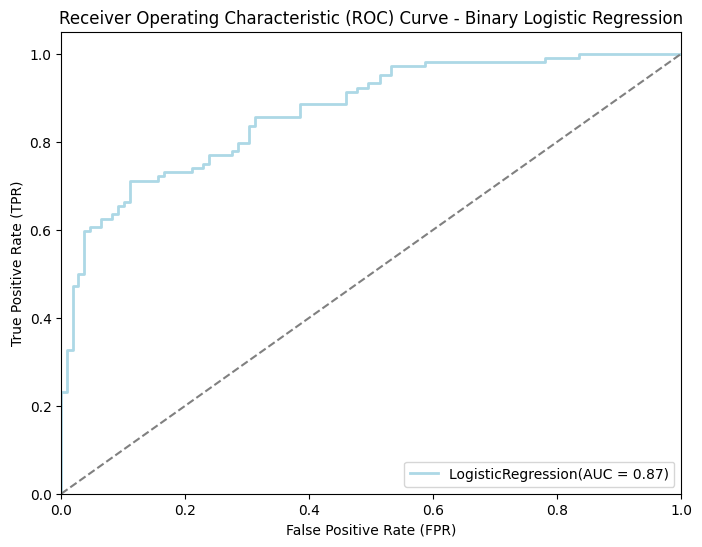

In [23]:
# 20240613创建逻辑回归
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# 创建逻辑回归二分类器实例
logreg_binary = LogisticRegression(solver='liblinear', max_iter=1000)

# 训练模型
logreg_binary.fit(X_train_lasso, y_train)

# 预测概率
y_proba_binary = logreg_binary.predict_proba(X_test_lasso)[:, 1]

# 计算AUC值
auc_binary = roc_auc_score(y_test, y_proba_binary)


# 评估模型
y_pred_binary = logreg_binary.predict(X_test_lasso)
accuracy_binary = accuracy_score(y_test, y_pred_binary)
print(f'二分类逻辑回归准确率：{accuracy_binary:.2f}')

# 打印评估结果
print(f"二分类逻辑回归AUC: {auc_binary}")
print("分类报告:")
print(classification_report(y_test, y_pred_binary))
print("混淆矩阵:")
print(confusion_matrix(y_test, y_pred_binary))

# 计算ROC曲线的参数
fpr_binary, tpr_binary, thresholds_binary = roc_curve(y_test, y_proba_binary)
# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_binary, tpr_binary, color='lightblue', lw=2, label=f'LogisticRegression(AUC = {auc_binary:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Binary Logistic Regression')
plt.legend(loc='lower right')
plt.show()


多分类逻辑回归准确率：0.77


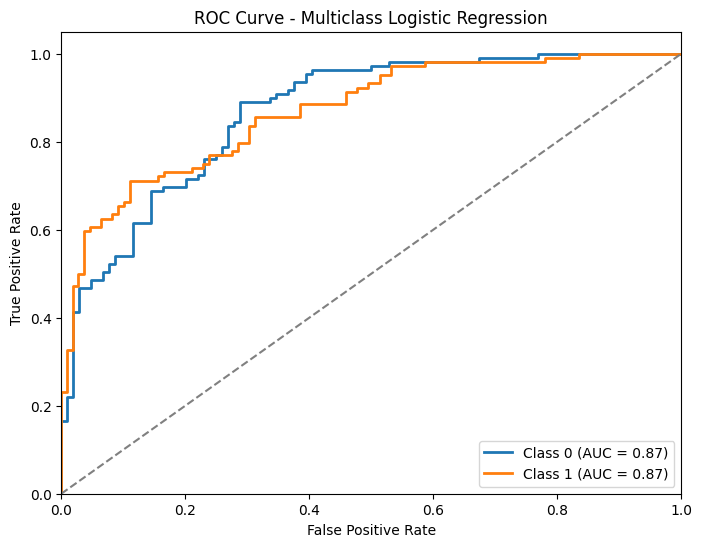

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# 创建逻辑回归多分类器实例
logreg_multiclass = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000)

# 训练模型
logreg_multiclass.fit(X_train_lasso, y_train)

# 预测概率
y_proba_multiclass = logreg_multiclass.predict_proba(X_test_lasso)
# 获取类别名称
classes = logreg_multiclass.classes_
num_classes = len(classes)
# 计算每个类别的ROC曲线和AUC值
fpr_multiclass = dict()
tpr_multiclass = dict()
auc_multiclass = dict()
for i in range(num_classes):
    fpr_multiclass[i], tpr_multiclass[i], _ = roc_curve(y_test, y_proba_multiclass[:, i], pos_label=i)
    auc_multiclass[i] = auc(fpr_multiclass[i], tpr_multiclass[i])
    
# 评估模型
y_pred_multiclass = logreg_multiclass.predict(X_test_lasso)
accuracy_multiclass = accuracy_score(y_test, y_pred_multiclass)
print(f'多分类逻辑回归准确率：{accuracy_multiclass:.2f}')
# 绘制ROC曲线 - 多分类逻辑回归
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr_multiclass[i], tpr_multiclass[i], lw=2, label=f'Class {classes[i]} (AUC = {auc_multiclass[i]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass Logistic Regression')
plt.legend(loc="lower right")
plt.show()




L1正则化逻辑回归准确率：0.76


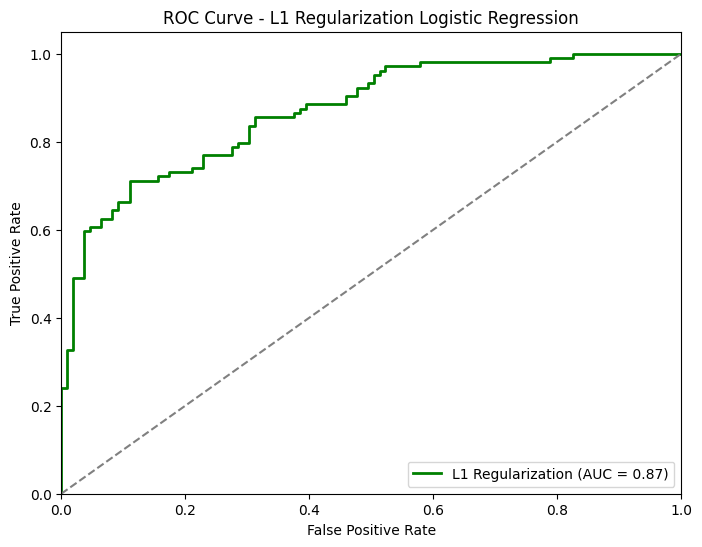

L2正则化逻辑回归准确率：0.77


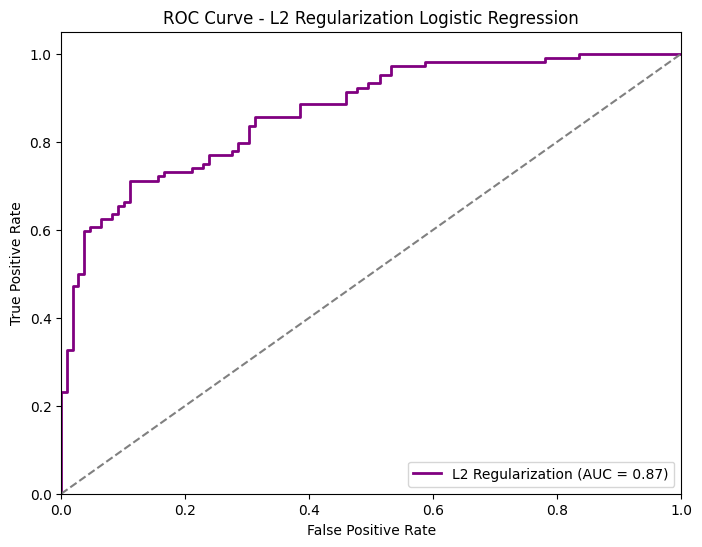

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# 创建L1正则化逻辑回归模型实例
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear')

# 训练模型
logreg_l1.fit(X_train_lasso, y_train)

# 预测概率
y_proba_l1 = logreg_l1.predict_proba(X_test_lasso)[:, 1]

# 计算ROC曲线的参数
fpr_l1, tpr_l1, thresholds_l1 = roc_curve(y_test, y_proba_l1)
# 计算AUC值
auc_l1 = auc(fpr_l1, tpr_l1)
# 评估模型 - L1正则化
y_pred_l1 = logreg_l1.predict(X_test_lasso)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print(f'L1正则化逻辑回归准确率：{accuracy_l1:.2f}')
# 绘制ROC曲线 - L1 正则化逻辑回归
plt.figure(figsize=(8, 6))
plt.plot(fpr_l1, tpr_l1, color='lightblue', lw=2, label=f'L1 Regularization (AUC = {auc_l1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - L1 Regularization Logistic Regression')
plt.legend(loc="lower right")
plt.show()


# 创建L2正则化逻辑回归模型实例
logreg_l2 = LogisticRegression(penalty='l2', solver='liblinear')

# 训练模型
logreg_l2.fit(X_train_lasso, y_train)

# 预测概率
y_proba_l2 = logreg_l2.predict_proba(X_test_lasso)[:, 1]

# 计算ROC曲线的参数
fpr_l2, tpr_l2, thresholds_l2 = roc_curve(y_test, y_proba_l2)
# 计算AUC值
auc_l2 = auc(fpr_l2, tpr_l2)
# 评估模型 - L2正则化
y_pred_l2 = logreg_l2.predict(X_test_lasso)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print(f'L2正则化逻辑回归准确率：{accuracy_l2:.2f}')
# 绘制ROC曲线 - L2 正则化逻辑回归
plt.figure(figsize=(8, 6))
plt.plot(fpr_l2, tpr_l2, color='lightblue', lw=2, label=f'L2 Regularization (AUC = {auc_l2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - L2 Regularization Logistic Regression')
plt.legend(loc="lower right")
plt.show()

二分类逻辑回归模型准确率: 0.77
二分类逻辑回归模型AUC值: 0.87
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       109
           1       0.78      0.73      0.76       104

    accuracy                           0.77       213
   macro avg       0.77      0.77      0.77       213
weighted avg       0.77      0.77      0.77       213

[[88 21]
 [28 76]]


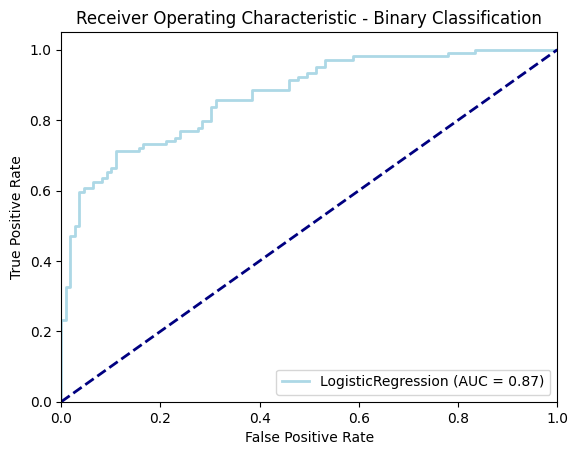

多分类逻辑回归模型准确率: 0.77
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       109
           1       0.78      0.73      0.76       104

    accuracy                           0.77       213
   macro avg       0.77      0.77      0.77       213
weighted avg       0.77      0.77      0.77       213

[[88 21]
 [28 76]]


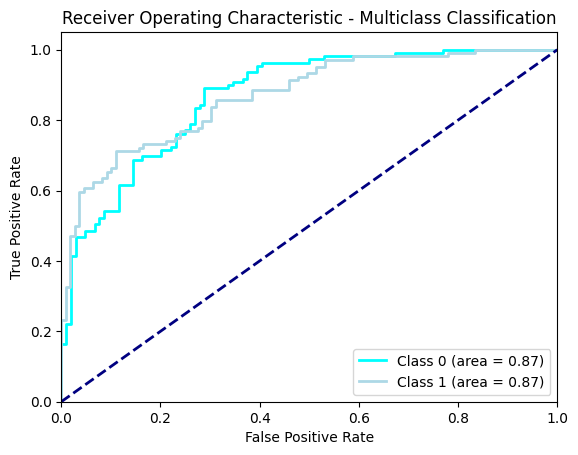

L1正则化逻辑回归模型准确率: 0.77
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       109
           1       0.78      0.73      0.76       104

    accuracy                           0.77       213
   macro avg       0.77      0.77      0.77       213
weighted avg       0.77      0.77      0.77       213

[[88 21]
 [28 76]]


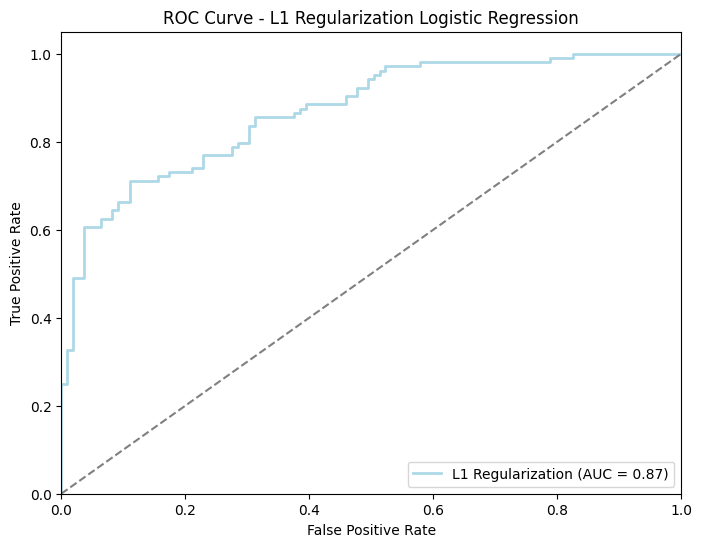

L2正则化逻辑回归模型准确率: 0.77
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       109
           1       0.78      0.73      0.76       104

    accuracy                           0.77       213
   macro avg       0.77      0.77      0.77       213
weighted avg       0.77      0.77      0.77       213

[[88 21]
 [28 76]]


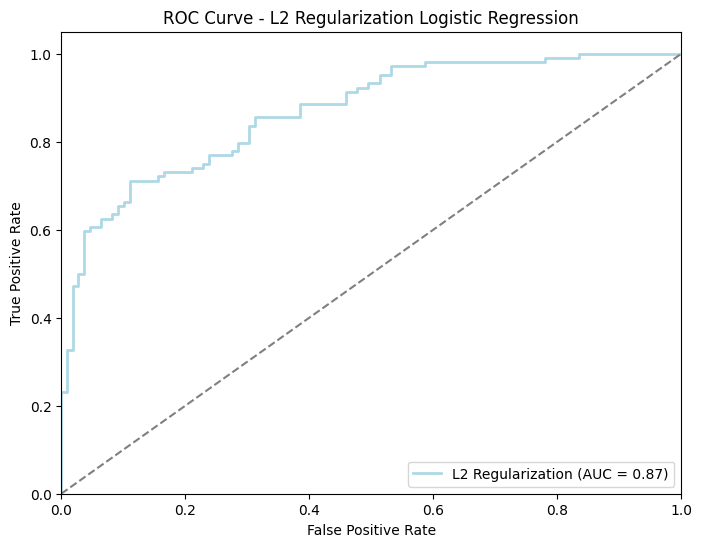

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize

# 二分类逻辑回归模型
logreg_binary = LogisticRegression(max_iter=1000)
logreg_binary.fit(X_train_lasso, y_train)

# 预测
y_pred_binary = logreg_binary.predict(X_test_lasso)
y_proba_binary = logreg_binary.predict_proba(X_test_lasso)[:, 1]

# 评估二分类逻辑回归模型
accuracy_binary = accuracy_score(y_test, y_pred_binary)
auc_binary = roc_auc_score(y_test, y_proba_binary)

print(f"二分类逻辑回归模型准确率: {accuracy_binary:.2f}")
print(f"二分类逻辑回归模型AUC值: {auc_binary:.2f}")
print(classification_report(y_test, y_pred_binary))
print(confusion_matrix(y_test, y_pred_binary))

# 绘制二分类的ROC曲线
fpr_binary, tpr_binary, _ = roc_curve(y_test, y_proba_binary)
plt.figure()
plt.plot(fpr_binary, tpr_binary, color='lightblue', lw=2, label=f'LogisticRegression (AUC = {auc_binary:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Binary Classification')
plt.legend(loc="lower right")
plt.show()


y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# logreg_multiclass = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)
# logreg_multiclass.fit(X_train_lasso, y_train)

# 创建逻辑回归多分类器实例
logreg_multiclass = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000)

# 训练模型
logreg_multiclass.fit(X_train_lasso, y_train)

# 预测
y_pred_multiclass = logreg_multiclass.predict(X_test_lasso)
y_proba_multiclass = logreg_multiclass.predict_proba(X_test_lasso)

# 评估多分类逻辑回归模型
accuracy_multiclass = accuracy_score(y_test, y_pred_multiclass)
print(f"多分类逻辑回归模型准确率: {accuracy_multiclass:.2f}")
print(classification_report(y_test, y_pred_multiclass))
print(confusion_matrix(y_test, y_pred_multiclass))
# 获取类别名称
classes = logreg_multiclass.classes_
num_classes = len(classes)
# 多分类逻辑回归模型
n_classes = len(classes)

# 绘制多分类的ROC曲线
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_proba_multiclass[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
colors = ['aqua', 'lightblue', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

# L1正则化逻辑回归模型
logreg_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=2000)
logreg_l1.fit(X_train_lasso, y_train)

# 预测
y_pred_l1 = logreg_l1.predict(X_test_lasso)
# 预测概率
y_proba_l1 = logreg_l1.predict_proba(X_test_lasso)[:, 1]

# 评估L1正则化逻辑回归模型
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print(f"L1正则化逻辑回归模型准确率: {accuracy_l1:.2f}")
print(classification_report(y_test, y_pred_l1))
print(confusion_matrix(y_test, y_pred_l1))

# 计算ROC曲线的参数
fpr_l1, tpr_l1, thresholds_l1 = roc_curve(y_test, y_proba_l1)
# 计算AUC值
auc_l1 = auc(fpr_l1, tpr_l1)
# 评估模型 - L1正则化
# 绘制ROC曲线 - L1 正则化逻辑回归
plt.figure(figsize=(8, 6))
plt.plot(fpr_l1, tpr_l1, color='lightblue', lw=2, label=f'L1 Regularization (AUC = {auc_l1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - L1 Regularization Logistic Regression')
plt.legend(loc="lower right")
plt.show()


# L2正则化逻辑回归模型
logreg_l2 = LogisticRegression(penalty='l2', max_iter=1000)
logreg_l2.fit(X_train_lasso, y_train)

# 预测
y_pred_l2 = logreg_l2.predict(X_test_lasso)
y_proba_l2 = logreg_l2.predict_proba(X_test_lasso)[:, 1]

# 评估L2正则化逻辑回归模型
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print(f"L2正则化逻辑回归模型准确率: {accuracy_l2:.2f}")
print(classification_report(y_test, y_pred_l2))
print(confusion_matrix(y_test, y_pred_l2))
# 计算ROC曲线的参数
fpr_l2, tpr_l2, thresholds_l2 = roc_curve(y_test, y_proba_l2)
# 计算AUC值
auc_l2 = auc(fpr_l2, tpr_l2)
# 绘制L2正则化的ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_l2, tpr_l2, color='lightblue', lw=2, label=f'L2 Regularization (AUC = {auc_l2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - L2 Regularization Logistic Regression')
plt.legend(loc="lower right")
plt.show()



模型准确率: 0.77
模型AUC值: 0.87
混淆矩阵:
[[88 21]
 [28 76]]
分类报告:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       109
           1       0.78      0.73      0.76       104

    accuracy                           0.77       213
   macro avg       0.77      0.77      0.77       213
weighted avg       0.77      0.77      0.77       213



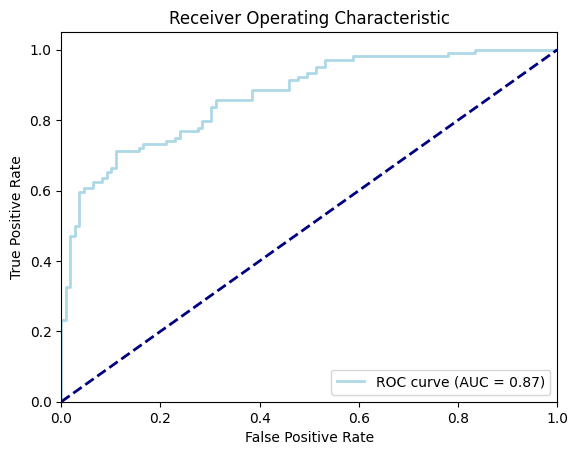

In [19]:
# 训练逻辑回归模型
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_lasso, y_train)

# 预测
y_pred = logreg.predict(X_test_lasso)
y_proba = logreg.predict_proba(X_test_lasso)[:, 1]

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
auc_value = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"模型准确率: {accuracy:.2f}")
print(f"模型AUC值: {auc_value:.2f}")
print("混淆矩阵:")
print(conf_matrix)
print("分类报告:")
print(class_report)

# 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='lightblue', lw=2, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


AUC: 0.85
分类报告:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       109
           1       0.78      0.77      0.77       104

    accuracy                           0.78       213
   macro avg       0.78      0.78      0.78       213
weighted avg       0.78      0.78      0.78       213


混淆矩阵:
[[86 23]
 [24 80]]


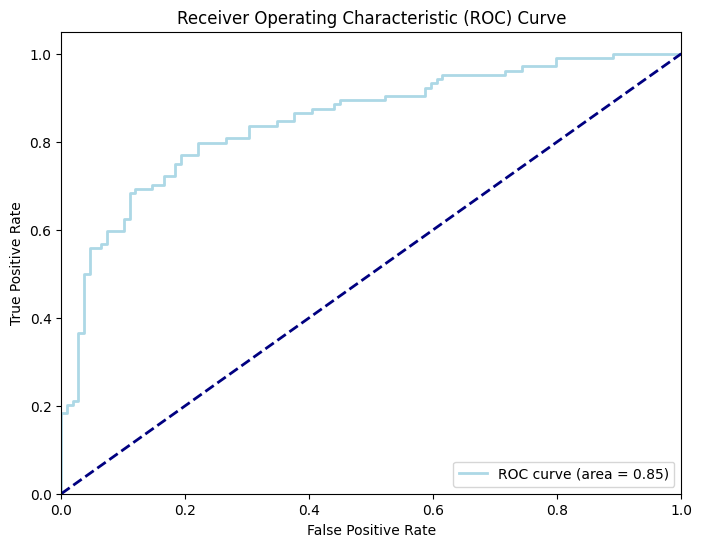

In [20]:
# eXtreme Gradient Boosting梯度提升XGB
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# 初始化 XGBoost 模型
xgb_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)

# 训练模型
xgb_model.fit(X_train_lasso, y_train)

# 预测测试集的概率
y_prob = xgb_model.predict_proba(X_test_lasso)[:, 1]

# 计算ROC曲线的参数
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# 计算AUC值
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")

# 模型预测
y_pred = np.round(y_prob)

# 打印混淆矩阵和分类报告
print("分类报告:")
print(classification_report(y_test, y_pred))
print("\n混淆矩阵:")
print(confusion_matrix(y_test, y_pred))

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='lightblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

ROC AUC=0.7133468595624559
AUC=0.7967537050105857
分类报告:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       109
           1       0.71      0.70      0.71       104

    accuracy                           0.71       213
   macro avg       0.71      0.71      0.71       213
weighted avg       0.71      0.71      0.71       213


混淆矩阵:
[[79 30]
 [31 73]]


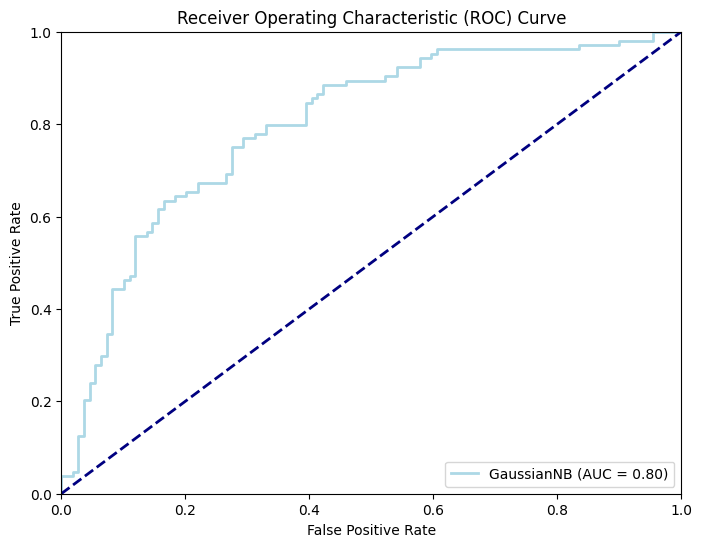

In [21]:
# GNB(高斯朴素贝叶斯，Gaussian Naive Bayes)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
# 初始化GNB模型
gnb = GaussianNB()

# 训练模型
gnb.fit(X_train_lasso, y_train)
# 预测测试集的概率
y_prob = gnb.predict_proba(X_test_lasso)[:, 1]

y_pred_proba = gnb.predict(X_test_lasso)

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'ROC AUC={roc_auc}')

# 计算AUC值
roc_auc = auc(fpr, tpr)

print(f'AUC={roc_auc}')

# 打印混淆矩阵和分类报告
print("分类报告:")
print(classification_report(y_test, y_pred_proba))
print("\n混淆矩阵:")
print(confusion_matrix(y_test, y_pred_proba))
# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='lightblue', lw=2, label='GaussianNB (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


AUC: 0.86
Confusion Matrix:
[[83 26]
 [23 81]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       109
           1       0.76      0.78      0.77       104

    accuracy                           0.77       213
   macro avg       0.77      0.77      0.77       213
weighted avg       0.77      0.77      0.77       213



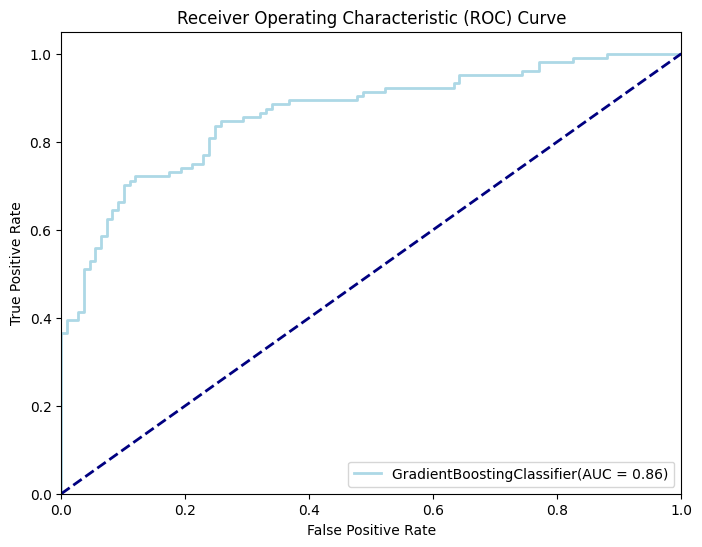

In [22]:
# 初始化GBM模型
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)

# 训练模型
gbm.fit(X_train_lasso, y_train)

# 预测测试集的概率
y_prob = gbm.predict_proba(X_test_lasso)[:, 1]

# 计算ROC曲线的参数
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# 计算AUC值
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")
# 模型预测
y_pred = gbm.predict(X_test_lasso)

# 打印混淆矩阵和分类报告
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='lightblue', lw=2, label='GradientBoostingClassifier(AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


